#  **Data Analysis with Python**


## Netflix dataset
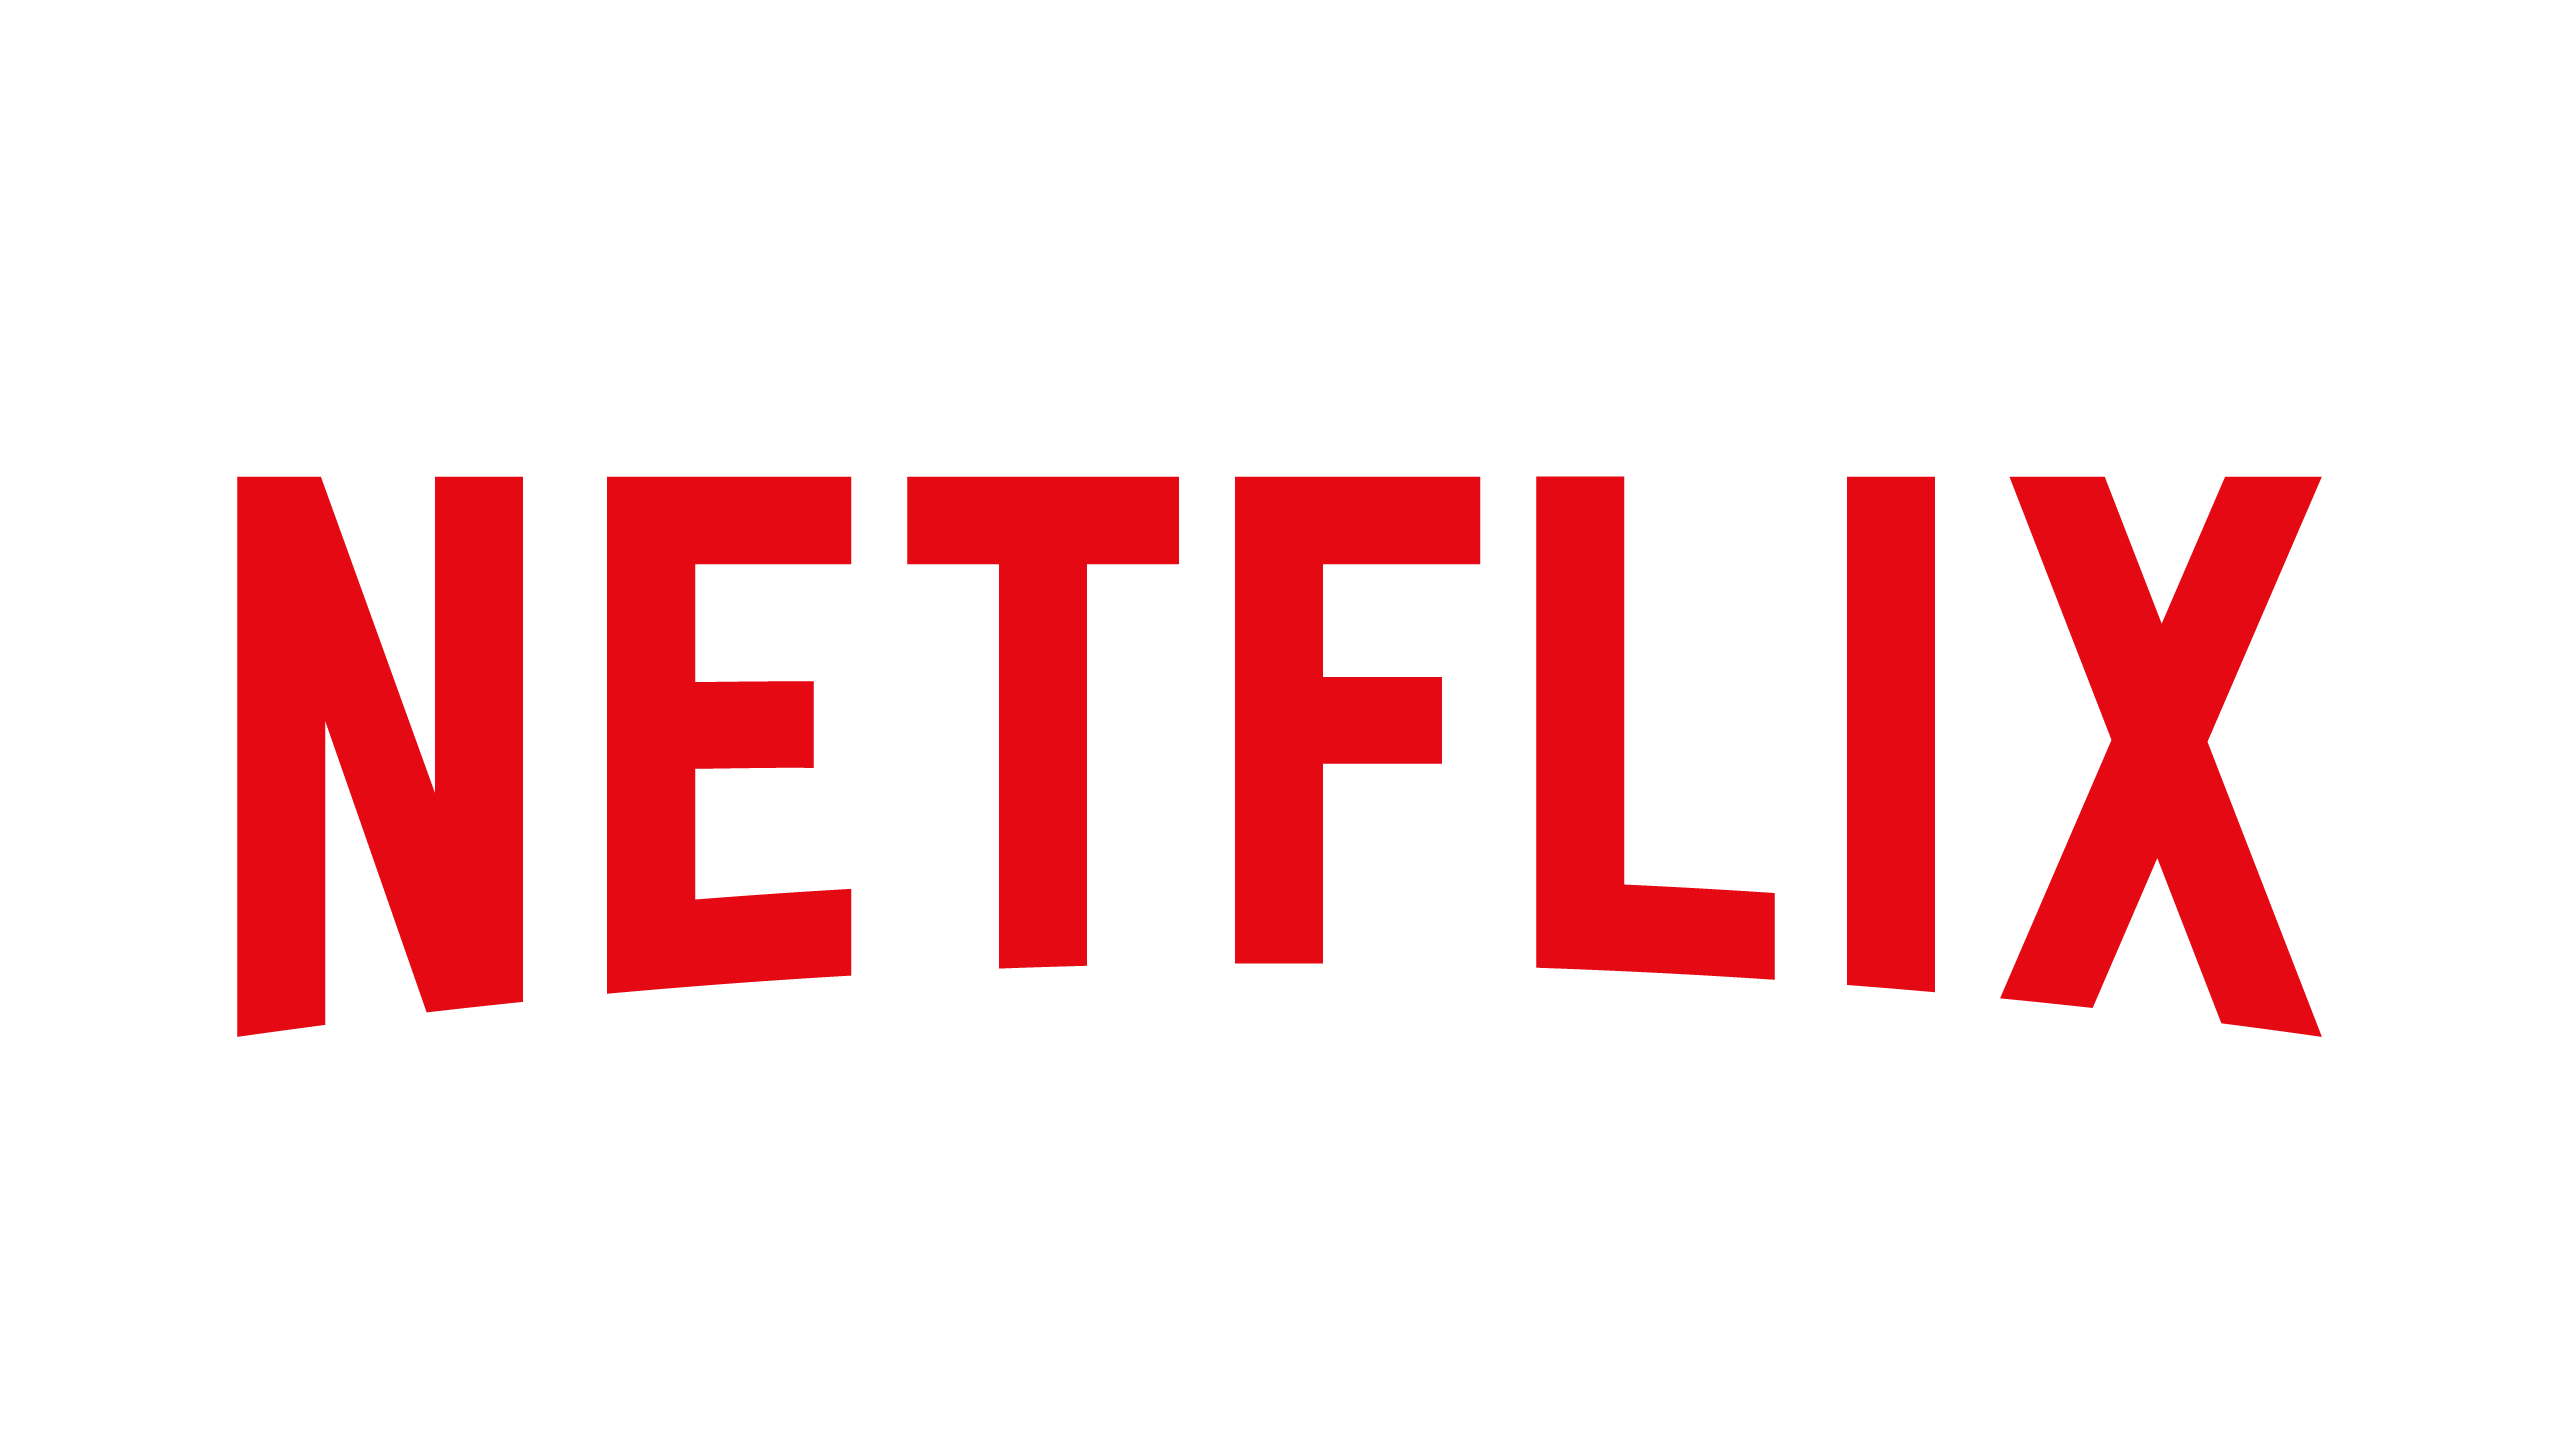

This Netflix dataset has information about the TV Shows and Movies available on Netflix till 2021.

This dataset is collected from Flixable which is a third-party Netflix search engine, and available on Kaggle website for free.

-------

## Imorting Libraries and DataFrame

In [421]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Avnish\OneDrive\Documents\Data Science\Notes\DataSets\8. Netflix Dataset.csv")                     # to import pandas library

In [422]:
df.head(5)                                      # to show bottom-5 records of dfset

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [423]:
df.shape                                   

(7789, 11)

In [424]:
df.size                                    

85679

In [425]:
df.columns                   

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [426]:
df.dtypes            

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [427]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

In [428]:
df.info()                             

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7789 non-null   object        
 1   Category      7789 non-null   object        
 2   Title         7789 non-null   object        
 3   Director      5401 non-null   object        
 4   Cast          7071 non-null   object        
 5   Country       7282 non-null   object        
 6   Release_Date  7691 non-null   datetime64[ns]
 7   Rating        7782 non-null   object        
 8   Duration      7789 non-null   object        
 9   Type          7789 non-null   object        
 10  Description   7789 non-null   object        
dtypes: datetime64[ns](1), object(10)
memory usage: 669.5+ KB


### Task.1. Is there any Duplicate Record in this dataset ? If yes, then remove the duplicate records.

In [429]:
df.head(1)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [430]:
df[df.duplicated()]                                         # To check row wise and detect the Duplicate rows  

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,2019-04-05,TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,2020-09-04,TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [431]:
df.drop_duplicates(inplace = True)                              

In [432]:
df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description


----

In [433]:
df.sort_values(by='Release_Date', inplace= True)

### Task.2. Is there any Null Value present in any column ? Show with Heat-map.

In [434]:
df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      98
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

### **Seaborn library (heat-map)**

In [435]:
import seaborn as sns                                               # To import Seaborn library

<Axes: >

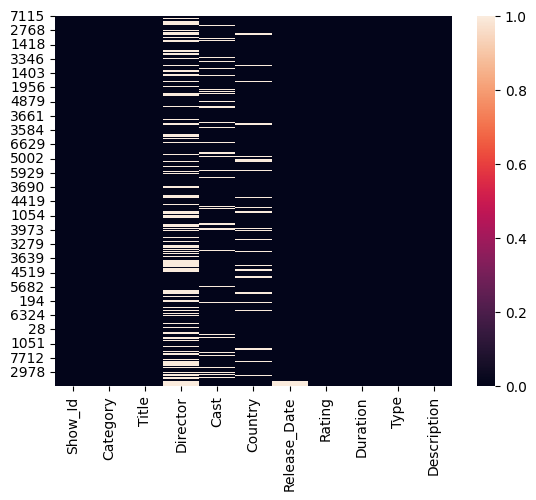

In [436]:
sns.heatmap(df.isnull())                                               # Using heat-map to show null values count

## **Filling Missing Values**

In [437]:
df['Director'].fillna('Unknown', inplace=True)
df.fillna({'Country': 'Unknown'}, inplace=True)
df.fillna({'Cast': 'Unknown'}, inplace=True)

C:\Users\Avnish\AppData\Local\Temp\ipykernel_9196\967015714.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Director'].fillna('Unknown', inplace=True)


In [438]:
df['Release_Date'].fillna(method='ffill', inplace=True )

C:\Users\Avnish\AppData\Local\Temp\ipykernel_9196\536176590.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Release_Date'].fillna(method='ffill', inplace=True )
C:\Users\Avnish\AppData\Local\Temp\ipykernel_9196\536176590.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Release_Date'].fillna(method='ffill', inplace=True )


In [439]:
df.isnull().sum()     

Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          7
Duration        0
Type            0
Description     0
dtype: int64

----

----

### 1. For 'House of Cards', what is the Show Id and Who is the Director of this show ?

In [440]:
df[df['Title'].isin(['House of Cards'])]       #  To show all records of a particular item in any column

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,2018-11-02,TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


In [441]:
df[df['Title'].str.contains('House of Cards')]          #  To show all records of a particular string in any column

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,2018-11-02,TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


----

### 2. In which year highest number of the TV Shows & Movies were released ? Show with Bar Graph.

In [442]:
df['Date_N'] = pd.to_datetime(df['Release_Date'], format="%B %d, %Y", errors='coerce')

In [443]:
df.head(1)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N
7115,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008-01-01


In [444]:
df['Date_N'] = pd.to_datetime(df['Release_Date'], format="%B %d, %Y", errors='coerce')

In [445]:
df['Date_N'].dt.year.value_counts()               

Date_N
2019    2136
2020    2008
2018    1661
2017    1201
2016     432
2021     215
2015      79
2014      24
2011      13
2013      10
2012       3
2008       2
2009       2
2010       1
Name: count, dtype: int64

<Axes: xlabel='Date_N'>

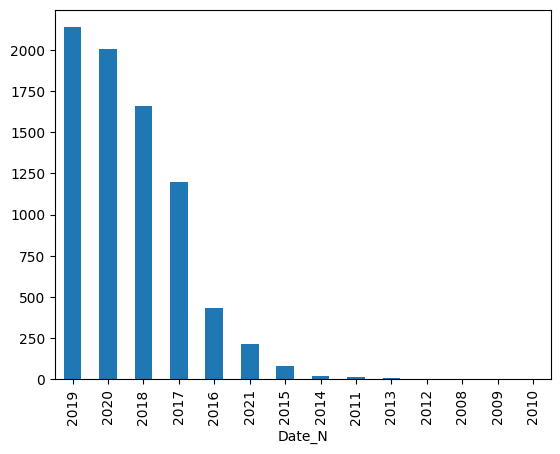

In [446]:
df['Date_N'].dt.year.value_counts().plot(kind='bar')

----

### 3. How many Movies & TV Shows are in the dfset ? Show with Bar Graph.

In [447]:
df.groupby('Category').Category.count()                 # To group all unique items of a column and show their count

Category
Movie      5377
TV Show    2410
Name: Category, dtype: int64

<Axes: xlabel='count', ylabel='Category'>

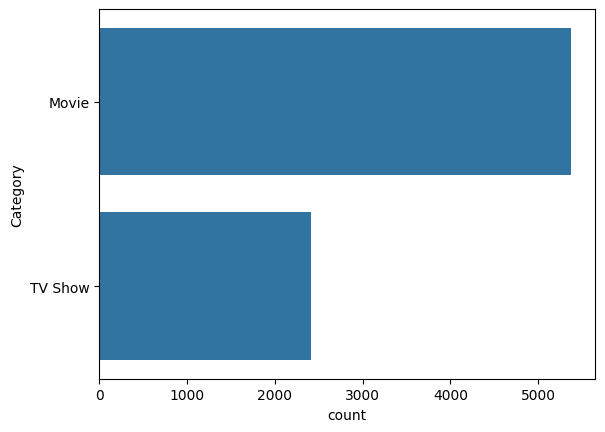

In [448]:
sns.countplot(df['Category'])        # To show the count of all unique values of any column in the form of bar graph

----

### 4. Show all the Movies that were released in year 2000.

In [449]:
df['Year'] = df['Date_N'].dt.year

In [450]:
df[ (df['Category'] == 'Movie') & (df['Year']==2000) ]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,Year


### 5. Show only the Titles of all TV Shows that were released in India only.

In [451]:
df[ (df['Category']=='TV Show') & (df['Country']=='India') ] ['Title']

6469                The House That Made Me
698             Badalte Rishton Ki Dastaan
5110                          Razia Sultan
3865                    Maharakshak: Aryan
3355      Khelti Hai Zindagi Aankh Micholi
                       ...                
880                     Bhaag Beanie Bhaag
4724                       Paava Kadhaigal
5145                      Regiment Diaries
4086    Mighty Little Bheem: Kite Festival
5018                   Pyaar Tune Kya Kiya
Name: Title, Length: 71, dtype: object

----

### 6. Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?

In [452]:
df['Director'].value_counts().head(10)

Director
Unknown                   2388
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Jay Chapman                 12
Steven Spielberg            10
David Dhawan                 9
Name: count, dtype: int64

----

### 7. Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom".

In [453]:
df[ (df['Category']=='Movie') & (df['Type']=='Comedies') ]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,Year
1229,s1230,Movie,Casa de mi Padre,Matt Piedmont,"Will Ferrell, Gael García Bernal, Diego Luna, ...","United States, Mexico",2012-11-14,R,84 min,Comedies,Will Ferrell stars as a Spanish-speaking cowbo...,2012-11-14,2012
5680,s5680,Movie,SMOSH: The Movie,Alex Winter,"Ian Hecox, Anthony Padilla, Jenna Marbles, Gra...",United States,2015-09-22,PG-13,83 min,Comedies,To keep his teen crush from spotting him in an...,2015-09-22,2015
2817,s2818,Movie,Hot Bot,Michael Polish,"Cynthia Kirchner, Doug Haley, Zack Pearlman, L...",United States,2016-03-01,NR,93 min,Comedies,Two teenage geeks inadvertently find a lifelik...,2016-03-01,2016
999,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,2016-03-01,R,90 min,Comedies,New NFL star Thad buys his old teammates' belo...,2016-03-01,2016
3833,s3834,Movie,Mac & Devin Go to High School,Dylan C. Brown,"Snoop Dogg, Wiz Khalifa, Mike Epps, Teairra Ma...",United States,2016-04-20,R,76 min,Comedies,Devin Overstreet may be the class valedictoria...,2016-04-20,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6237,s6237,Movie,The Con Is On,James Haslam,"Uma Thurman, Tim Roth, Alice Eve, Parker Posey...","United States, United Kingdom",2020-12-21,R,95 min,Comedies,Two wedded partners-in-crime flee from their m...,2020-12-21,2020
1675,s1676,Movie,Death to 2020,"Al Campbell, Alice Mathias","Samuel L. Jackson, Hugh Grant, Lisa Kudrow, Ku...",United States,2020-12-27,TV-MA,71 min,Comedies,"As the year we all want to end finally does, t...",2020-12-27,2020
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,2021-01-01,PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021-01-01,2021
4007,s4008,Movie,Mean Girls 2,Melanie Mayron,"Meaghan Martin, Maiara Walsh, Jennifer Stone, ...",United States,2021-01-01,PG-13,98 min,Comedies,The father of a high school pariah offers to p...,2021-01-01,2021


In [454]:
df[ (df['Category']=='Movie') & (df['Type']=='Comedies') | (df['Country']=='United Kingdom')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,Year
1229,s1230,Movie,Casa de mi Padre,Matt Piedmont,"Will Ferrell, Gael García Bernal, Diego Luna, ...","United States, Mexico",2012-11-14,R,84 min,Comedies,Will Ferrell stars as a Spanish-speaking cowbo...,2012-11-14,2012
4877,s4877,TV Show,Planet Earth: The Complete Collection,Alastair Fothergill,David Attenborough,United Kingdom,2015-04-22,TV-PG,1 Season,"British TV Shows, Docuseries, International TV...",This landmark series transports nature lovers ...,2015-04-22,2015
1597,s1598,TV Show,Danger Mouse: Classic Collection,Unknown,"David Jason, Terry Scott, Edward Kelsey, Brian...",United Kingdom,2015-06-15,TV-Y,10 Seasons,"British TV Shows, Kids' TV, TV Comedies",Follow the adventures of superspy Danger Mouse...,2015-06-15,2015
5680,s5680,Movie,SMOSH: The Movie,Alex Winter,"Ian Hecox, Anthony Padilla, Jenna Marbles, Gra...",United States,2015-09-22,PG-13,83 min,Comedies,To keep his teen crush from spotting him in an...,2015-09-22,2015
6149,s6149,TV Show,The Blue Planet: A Natural History of the Oceans,Alastair Fothergill,David Attenborough,United Kingdom,2015-10-10,TV-G,1 Season,"British TV Shows, Docuseries, International TV...",David Attenborough narrates this definitive ex...,2015-10-10,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,s3646,TV Show,Limmy's Show!,Unknown,"Brian Limond, Debbie Welsh, Tom Brogan, Raymon...",United Kingdom,2021-01-16,TV-MA,2 Seasons,"British TV Shows, TV Comedies","Scottish comic Brian ""Limmy"" Limond headlines ...",2021-01-16,2021
4434,s4435,TV Show,Nature's Weirdest Events,Unknown,Chris Packham,United Kingdom,2021-01-16,TV-PG,3 Seasons,"British TV Shows, Docuseries, Science & Nature TV",Host Chris Packham examines bizarre natural ph...,2021-01-16,2021
5144,s5144,TV Show,Reggie Yates Outside Man,Unknown,Reggie Yates,United Kingdom,2021-01-16,TV-MA,2 Seasons,"British TV Shows, Docuseries, International TV...",Award-winning filmmaker Reggie Yates travels a...,2021-01-16,2021
6485,s6484,TV Show,The Inbetweeners,Unknown,"Simon Bird, James Buckley, Blake Harrison, Joe...",United Kingdom,2021-01-16,TV-MA,3 Seasons,"British TV Shows, TV Comedies",This rib-tickling series follows four English ...,2021-01-16,2021


----

### 8. In how many movies/shows, Tom Cruise was cast ?

In [455]:
df[df['Cast'] == 'Tom Cruise']

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,Year


In [456]:
df[df['Cast'].str.contains('Tom Cruise')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,Year
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,2019-07-01,R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019-07-01,2019
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,2020-01-01,R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020-01-01,2020


----

### 9. What are the different Ratings defined by Netflix ?

In [457]:
df.Rating.nunique()

14

In [458]:
df['Rating'].unique()

array(['TV-MA', 'NR', 'TV-PG', 'TV-14', 'PG', 'R', 'TV-G', 'G', 'TV-Y',
       'TV-Y7', 'PG-13', 'TV-Y7-FV', nan, 'NC-17', 'UR'], dtype=object)

#### 10. How many Movies got the 'TV-14' rating, in Canada ?

In [459]:

df[(df['Category']=='Movie') & (df['Rating']=='TV-14') & (df['Country']=='Canada')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,Year
5336,s5336,Movie,Sadie's Last Days on Earth,Michael Seater,"Morgan Taylor Campbell, Clark Backo, Ricardo H...",Canada,2017-08-22,TV-14,94 min,"Comedies, Sci-Fi & Fantasy",High schooler Sadie Mitchell believes the worl...,2017-08-22,2017
3713,s3714,Movie,Long Time Running,"Jennifer Baichwal, Nicholas de Pencier","Gord Downie, Paul Langlois, Gord Sinclair, Rob...",Canada,2017-11-12,TV-14,96 min,"Documentaries, International Movies, Music & M...",This documentary follows the 2016 tour of belo...,2017-11-12,2017
5393,s5393,Movie,Sardaar ji,Rohit Jugraj,"Diljit Dosanjh, Neeru Bajwa, Mandy Takhar, Jas...",Canada,2017-12-01,TV-14,140 min,"Comedies, International Movies, Music & Musicals",When a palatial wedding venue turns out to be ...,2017-12-01,2017
1506,s1507,Movie,Counterfeiting in Suburbia,Jason Bourque,"Sarah Butler, Larissa Albuquerque, Kayla Walla...",Canada,2018-07-01,TV-14,88 min,"Dramas, Thrillers",Two teenagers print counterfeit money in their...,2018-07-01,2018
608,s609,Movie,At First Light,Jason Stone,"Stefanie Scott, Theodore Pellerin, Percy Hynes...",Canada,2018-12-27,TV-14,91 min,"Dramas, Sci-Fi & Fantasy",After mysterious lights imbue her with extraor...,2018-12-27,2018
34,s35,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,2019-04-10,TV-14,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...,2019-04-10,2019
7025,s7024,Movie,The Wrong Babysitter,George Mendeluk,"Daphne Zuniga, Seann Gallagher, Lisa Marie Car...",Canada,2019-06-18,TV-14,89 min,Thrillers,A widow searches for her missing teenage daugh...,2019-06-18,2019
6062,s6062,Movie,The Accountant of Auschwitz,Matthew Shoychet,Unknown,Canada,2019-07-01,TV-14,78 min,"Documentaries, International Movies","Decades after WWII, a former SS officer stands...",2019-07-01,2019
3956,s3957,Movie,"Martin Matte: La vie, la mort...eh la la..!",Jean-François Blais,Martin Matte,Canada,2019-10-14,TV-14,62 min,Stand-Up Comedy,Quebecois comedy star Martin Matte serves up e...,2019-10-14,2019
30,s31,Movie,#cats_the_mewvie,Michael Margolis,Unknown,Canada,2020-02-05,TV-14,90 min,"Documentaries, International Movies",This pawesome documentary explores how our fel...,2020-02-05,2020


In [460]:
len(df[(df['Category']=='Movie') & (df['Rating']=='TV-14') & (df['Country']=='Canada')])   

11

#### 11. How many TV Show got the 'R' rating, after year 2018 ?

In [461]:
df[(df['Category']=='TV Show') & (df['Rating']=='R') & (df['Year'] > 2018)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,Year
6437,s6436,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",Unknown,2019-04-25,R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...,2019-04-25,2019


----

### 12. What is the maximum duration of a Movie/Show on Netflix ?

In [462]:
df.Duration.unique()

array(['81 min', '1 Season', '104 min', '29 min', '84 min', '103 min',
       '75 min', '93 min', '95 min', '94 min', '96 min', '76 min',
       '26 min', '5 Seasons', '4 Seasons', '72 min', '44 min', '80 min',
       '100 min', '130 min', '105 min', '3 Seasons', '8 Seasons',
       '35 min', '78 min', '71 min', '68 min', '90 min', '73 min',
       '48 min', '83 min', '58 min', '82 min', '77 min', '2 Seasons',
       '143 min', '6 Seasons', '10 Seasons', '92 min', '69 min', '60 min',
       '155 min', '62 min', '64 min', '99 min', '135 min', '137 min',
       '86 min', '59 min', '85 min', '91 min', '57 min', '74 min',
       '120 min', '70 min', '47 min', '101 min', '23 min', '110 min',
       '24 min', '55 min', '46 min', '108 min', '107 min', '52 min',
       '43 min', '65 min', '97 min', '88 min', '109 min', '116 min',
       '127 min', '66 min', '98 min', '163 min', '102 min', '79 min',
       '114 min', '157 min', '87 min', '106 min', '117 min', '112 min',
       '51 min', '128 mi

In [463]:
movie_duration = df[df['Duration'].str.contains('min')]

In [464]:
movie_duration.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,Year
7115,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008-01-01,2008
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009-05-05,2009


In [465]:
movie_duration['minutes'] = movie_duration['Duration'].str.replace('min', ' ').astype(int)

C:\Users\Avnish\AppData\Local\Temp\ipykernel_9196\3185946853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_duration['minutes'] = movie_duration['Duration'].str.replace('min', ' ').astype(int)


In [466]:
movie_duration['minutes'].max()

312

## Maximum duration for a Movie is **312** minutes.

In [467]:
show_duration = df[df['Duration'].str.contains('Season')]

In [468]:
show_duration['seasons'] = show_duration['Duration'].str.replace('Seasons|Season| ', '', regex=True).astype(int)

C:\Users\Avnish\AppData\Local\Temp\ipykernel_9196\3668614086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show_duration['seasons'] = show_duration['Duration'].str.replace('Seasons|Season| ', '', regex=True).astype(int)


In [469]:
show_duration.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,Year,seasons
1765,s1766,TV Show,Dinner for Five,Unknown,Unknown,United States,2008-02-04,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",2008-02-04,2008,1
3098,s3099,TV Show,Jack Taylor,Stuart Orme,"Iain Glen, Killian Scott, Nora-Jane Noone, Tar...","United States, Ireland",2013-03-31,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",Ken Bruen's bestselling crime novels leap to l...,2013-03-31,2013,1


In [470]:
show_duration['seasons'].max()

16

## Maximum duration for a **SHOW** is **16** Seasons.

----

### 13. Which individual country has the Highest No. of TV Shows ?

In [471]:
df.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,Year
7115,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008-01-01,2008
1765,s1766,TV Show,Dinner for Five,Unknown,Unknown,United States,2008-02-04,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",2008-02-04,2008


In [472]:
df_tvshow = df[df['Category'] == 'TV Show']

In [473]:
df_tvshow.Country.value_counts().head(1)

Country
United States    705
Name: count, dtype: int64

----

### 14. How can we sort the dataset by Year ?

In [474]:
df.sort_values(by = 'Year')

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,Year
7115,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008-01-01,2008
1765,s1766,TV Show,Dinner for Five,Unknown,Unknown,United States,2008-02-04,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",2008-02-04,2008
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009-05-05,2009
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009-11-18,2009
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,2010-11-01,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",2010-11-01,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6479,s6478,TV Show,The Idhun Chronicles,Maite Ruiz De Austri,"Michelle Jenner, Itzan Escamilla, Sergio Mur, ...",Spain,2021-01-08,TV-14,2 Seasons,"Anime Series, International TV Shows, Spanish-...",A boy suddenly orphaned fights his parents' ki...,2021-01-08,2021
2349,s2350,Movie,Gangaajal,Prakash Jha,"Ajay Devgn, Gracy Singh, Mohan Agashe, Mohan J...",India,2021-01-08,TV-MA,148 min,"Dramas, International Movies","Posted to a small, crime-ridden town, a cop so...",2021-01-08,2021
3018,s3019,TV Show,Inside the World’s Toughest Prisons,Unknown,Paul Connolly,United Kingdom,2021-01-08,TV-MA,5 Seasons,"British TV Shows, Crime TV Shows, Docuseries",Investigative journalist Paul Connolly becomes...,2021-01-08,2021
7147,s7146,Movie,Tony Parker: The Final Shot,Florent Bodin,Tony Parker,France,2021-01-06,TV-14,99 min,"Documentaries, International Movies, Sports Mo...",This film examines the background and career o...,2021-01-06,2021


In [475]:
# df.sort_values(by='Year', ascending=False).head(2)

df.sort_values(by = 'Year', ascending = False).head(10)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,Year
7655,s7654,TV Show,Women Behind Bars,Unknown,Unknown,United States,2021-01-16,TV-14,3 Seasons,"Crime TV Shows, Docuseries",This reality series recounts true stories of w...,2021-01-16,2021
57,s58,Movie,100% Halal,Jastis Arimba,"Anisa Rahma, Ariyo Wahab, Anandito Dwis, Fitri...",Indonesia,2021-01-07,TV-14,101 min,"Dramas, International Movies","After high school, a young woman marries the m...",2021-01-07,2021
3822,s3823,TV Show,Lupin,Unknown,"Omar Sy, Ludivine Sagnier, Clotilde Hesme, Nic...",United States,2021-01-08,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Inspired by the adventures of Arsène Lupin, ge...",2021-01-08,2021
3018,s3019,TV Show,Inside the World’s Toughest Prisons,Unknown,Paul Connolly,United Kingdom,2021-01-08,TV-MA,5 Seasons,"British TV Shows, Crime TV Shows, Docuseries",Investigative journalist Paul Connolly becomes...,2021-01-08,2021
2349,s2350,Movie,Gangaajal,Prakash Jha,"Ajay Devgn, Gracy Singh, Mohan Agashe, Mohan J...",India,2021-01-08,TV-MA,148 min,"Dramas, International Movies","Posted to a small, crime-ridden town, a cop so...",2021-01-08,2021
6479,s6478,TV Show,The Idhun Chronicles,Maite Ruiz De Austri,"Michelle Jenner, Itzan Escamilla, Sergio Mur, ...",Spain,2021-01-08,TV-14,2 Seasons,"Anime Series, International TV Shows, Spanish-...",A boy suddenly orphaned fights his parents' ki...,2021-01-08,2021
1285,s1286,Movie,Charming,Ross Venokur,"Wilmer Valderrama, Demi Lovato, Sia, Nia Varda...","Canada, United States, Cayman Islands",2021-01-08,TV-Y7,85 min,"Children & Family Movies, Comedies","On the eve of his 21st birthday, an adored pri...",2021-01-08,2021
4086,s4087,TV Show,Mighty Little Bheem: Kite Festival,Unknown,"Sumruddhi Shukla, Aranya Kaur, Nishka Raheja",India,2021-01-08,TV-Y,1 Season,"Kids' TV, TV Comedies","With winter behind them, Bheem and his townspe...",2021-01-08,2021
1004,s1005,Movie,BluffMaster!,Rohan Sippy,"Abhishek Bachchan, Priyanka Chopra, Riteish De...",India,2021-01-08,TV-14,129 min,"Comedies, International Movies, Romantic Movies",When his girlfriend learns the truth about his...,2021-01-08,2021
4966,s4966,TV Show,Pretend It’s a City,Unknown,Fran Lebowitz,United States,2021-01-08,TV-14,1 Season,Docuseries,Wander the New York City streets and fascinati...,2021-01-08,2021


----

### 15. Find all the instances where : 
### Category is 'Movie' and Type is 'Dramas' 
 **OR**
###  Category is 'TV Show' & Type is 'Kids' TV'

In [476]:
df [ (df['Category']=='Movie') & (df['Type']=='Dramas') | (df['Category']=='TV Show') & (df['Type']== "Kids' TV") ]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,Year
232,s233,Movie,A Stoning in Fulham County,Larry Elikann,"Ken Olin, Jill Eikenberry, Maureen Mueller, Gr...",United States,2011-10-01,TV-14,95 min,Dramas,"After reckless teens kill an Amish child, a pr...",2011-10-01,2011
2622,s2623,Movie,Hard Lessons,Eric Laneuville,"Denzel Washington, Lynn Whitfield, Richard Mas...",United States,2011-10-01,TV-14,94 min,Dramas,This drama based on real-life events tells the...,2011-10-01,2011
308,s309,Movie,Adam: His Song Continues,Robert Markowitz,"Daniel J. Travanti, JoBeth Williams, Richard M...",United States,2011-10-01,TV-MA,96 min,Dramas,"After their child was abducted and murdered, J...",2011-10-01,2011
5833,s5833,Movie,Strange Voices,Arthur Allan Seidelman,"Nancy McKeon, Valerie Harper, Stephen Macht, T...",United States,2011-10-01,TV-PG,96 min,Dramas,When their college-age daughter suddenly begin...,2011-10-01,2011
7364,s7363,Movie,Unspeakable Acts,Linda Otto,"Jill Clayburgh, Brad Davis, Sam Behrens",United States,2011-10-01,TV-14,95 min,Dramas,Laurie and Joseph are doctors who interview se...,2011-10-01,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,s3375,TV Show,Kikoriki,Unknown,Igor Dmitriev,Unknown,2021-01-16,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,2021-01-16,2021
3581,s3582,TV Show,Lego Friends,Unknown,"Elisa Schnebelie, Raquel Christiana, Lucia Vec...",Unknown,2021-01-16,TV-G,3 Seasons,Kids' TV,"As a way to make friends, new girl in town Oli...",2021-01-16,2021
3706,s3707,TV Show,LoliRock,Unknown,"Kazumi Evans, Kelly Sheridan, Vincent Tong, As...","South Korea, France",2021-01-16,TV-Y,2 Seasons,Kids' TV,A teenager with a beautiful voice becomes a po...,2021-01-16,2021
4113,s4114,TV Show,Mini Wolf,Unknown,Unknown,France,2021-01-16,TV-G,2 Seasons,Kids' TV,Mini-Wolf and his fun-loving pals friends are ...,2021-01-16,2021
